# Dimensionality Reduction

Many Machine Learning problems involve thousands or even millions of features foreach  training  instance.  Not  only  do  all  these  features  make  training  extremely  slow,but  they  can  also  make  it  much  harder  to  find  a  good  solution,  as  we  will  see. Thisproblem is often referred to as the curse of dimensionality.

Fortunately, in realworld problems, it is often possible to reduce the number of features considerably, turning an intractable problem into a tractable one. For example,consider the MNIST images: the pixels on the image borders  are  almost  always  white,  so  you  could  completely  drop  these  pixels  from  the training  set  without  losing  much  information. Additionally, two neighboring pixels  are  often  highly  correlated:  if  you  merge  them  into  a  single  pixel  (e.g.,  by  taking the mean of the two pixel intensities), you will not lose much information.

Reducing  dimensionality  does  cause  some  information  loss  (just like  compressing  an  image  to  JPEG  can  degrade  its  quality),  soeven  though  it  will  speed  up  training,  it  may  make  your  system perform  slightly  worse.  It  also  makes  your  pipelines  a  bit  more complex  and  thus  harder  to  maintain.  So,  if  training  is  too  slow, you  should  first  try  to  train  your  system  with  the  original  data before  considering  using  dimensionality  reduction.  In  some  cases, reducing  the  dimensionality  of  the  training  data  may  filter  outsome  noise  and  unnecessary  details  and  thus  result  in  higher  performance, but in general it won’t; it will just speed up training.

Apart  from  speeding  up  training,  dimensionality  reduction  is  also  extremely  usefulfor data visualization (or DataViz). Reducing the number of dimensions down to two(or three) makes it possible to plot a condensed view of a high-dimensional training set on a graph and often gain some important insights by visually detecting patterns, such  as  clusters.  Moreover,  DataViz  is  essential  to  communicate  your  conclusions  to people who are not data scientists in particular, decision makers who will use your results.In  this  chapter  we  will  discuss  the  curse  of  dimensionality  and  get  a  sense  of  whatgoes on in high-dimensional space. Then, we will consider the two main approachesto  dimensionality  reduction  (projection  and  Manifold  Learning),  and  we  will  gothrough three of the most popular dimensionality reduction techniques: PCA, KernelPCA, and LLE.

## The Curse of Dimensionality

We are so used to living in three dimensions1 that our intuition fails us when we try to imagine a high-dimensional space. Even a basic 4D hypercube is incredibly hard topicture in our minds (see Figure 8-1), let alone a 200-dimensional ellipsoid bent in a 1,000-dimensional space.

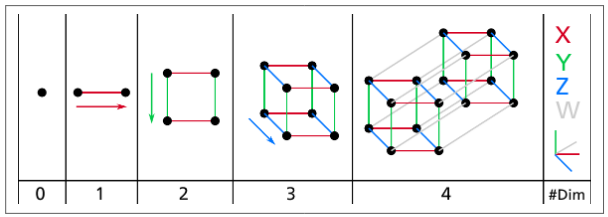

It turns out that many things behave very differently in high-dimensional space. For example, if you pick a random point in a unit square (a 1 × 1 square), it will have onlyabout a 0.4% chance of being located less than 0.001 from a border (in other words, it is very unlikely that a random point will be “extreme” along any dimension). But in a 10,000-dimensional unit hypercube, this probability is greater than 99.999999%. Mostpoints in a high-dimensional hypercube are very close to the border.

Here  is  a  more  troublesome  difference:  if  you  pick  two  points  randomly  in  a  unitsquare, the distance between these two points will be, on average, roughly 0.52. If youpick two random points in a unit 3D cube, the average distance will be roughly 0.66. But  what  about  two  points  picked  randomly  in  a  1,000,000-dimensional  hypercube?The average distance, believe it or not, will be about 408.25 (roughly 1, 000, 000/6)!This is counterintuitive: how can two points be so far apart when they both lie within the  same  unit  hypercube?  Well,  there’s  just  plenty  of  space  in  high  dimensions.  As  aresult,  high-dimensional  datasets  are  at  risk  of  being  very  sparse:  most  training in stances  are  likely  to  be  far  away  from  each  other.  This  also  means  that  a  new instance will likely be far away from any training instance, making predictions muchless reliable than in lower dimensions, since they will be based on much larger extrapolations.  In  short,  the  more  dimensions  the  training  set  has,  the  greater  the  risk  of overfitting it.

In theory, one solution to the curse of dimensionality could be to increase the size of the  training  set  to  reach  a  sufficient  density  of  training  instances.  Unfortunately,  in practice,  the  number  of  training  instances  required  to  reach  a  given  density  grows exponentially  with  the  number  of  dimensions.  With  just  100  features  (significantly fewer  than  in  the  MNIST  problem),  you  would  need  more  training  instances  than atoms  in  the  observable  universe  in  order  for  training  instances  to  be  within  0.1  of each  other  on  average,  assuming  they  were  spread  out  uniformly  across  all  dimensions.

## Main Approaches for Dimensionality Reduction

Before  we  dive  into  specific  dimensionality  reduction  algorithms,  let’s  take  a  look  at the  two  main  approaches  to  reducing  dimensionality:  projection  and  ManifoldLearning.

### Projection

In most realworld problems, training instances are not spread out uniformly across all dimensions. Many features are almost constant, while others are highly correlated (as discussed earlier for MNIST). As a result, all training instances lie within (or close to)  a  much  lower-dimensional  subspace  of  the  high-dimensional  space.  This  sounds very abstract, so let’s look at an example. In Figure below you can see a 3D dataset represented by circles.

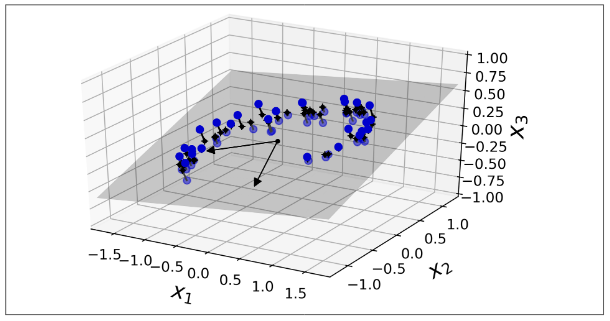

Notice that all training instances lie close to a plane: this is a lower-dimensional (2D) subspace  of  the  high-dimensional  (3D)  space.  If  we  project  every  training  instance perpendicularly  on to  this  subspace  (as  represented  by  the  short  lines  connecting  the instances  to  the  plane),  we  get  the  new  2D  dataset  shown  in  Figure below.  Ta-da!  We have just reduced the dataset’s dimensionality from 3D to 2D. Note that the axes correspond to new features z1 and z2 (the coordinates of the projections on the plane).

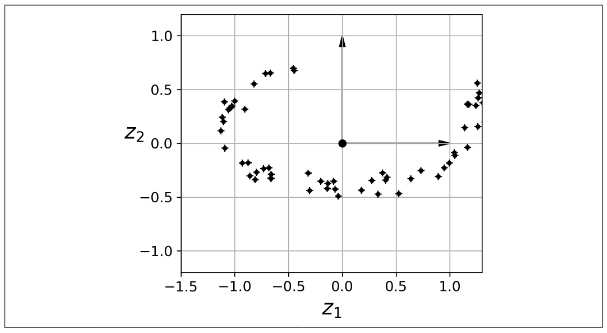



However,  projection  is  not  always  the  best  approach  to  dimensionality  reduction.  In many cases the subspace may twist and turn, such as in the famous Swiss roll toy data‐set represented in Figure below.

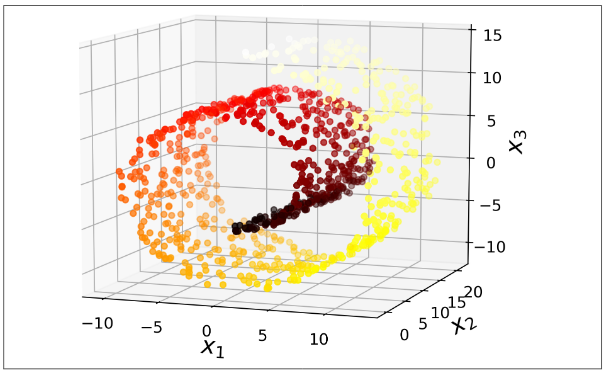

Simply projecting onto a plane (e.g., by dropping x3) would squash different layers of the Swiss roll together, as shown on the left side of Figure below. What you really want is to unroll the Swiss roll to obtain the 2D dataset on the right side of Figure below.

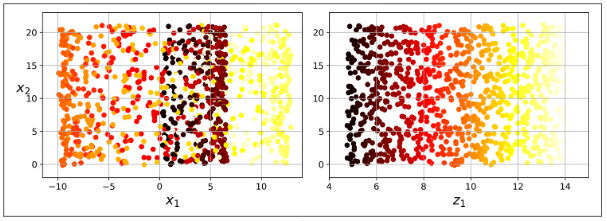